##Lagrange Multipliers

In [4]:
import matplotlib.pyplot as plt
import numpy as np

The case study:


*   Suppose we have a fixed budget for speding on marketing of 2500 dollar.
*   Suppose we can choose to invest in two types of campaigns: Social Media and TV, where you have to decide.
*   To simplify, let's say that one campaign on social media costs 25 dollar and one campaign on TV costs 250 dollar.
*   Suppose we have experimented a lot in the past and that we have been able to define the Revenues as a function of the two types of media investments.



In this notebook, we will find the maximum revenue and the number of different types of campaigns one should buy using Lagrange Multiplier.

In [5]:
cost_social = 25
cost_tv = 250
budget = 2500

The equation for costs:
25 dollars times the number of social campains + 250 times the number of tv campaigns
Since we want to spent exactly the budget we know that this is equal to 2500 dollar.

Otherwise, the constraint for our revenue optimization is: ***25 * social + 250 * tv = 2500*** -> Equation 1

In [6]:
#lets get the minimum and maximum number of campaigns:
social_min = 0
social_max = budget / cost_social

tv_min = 0
tv_max = budget / cost_tv

Task 1 - Solve for the variable 'social' in Equation 1 and return the value in the function.


In [7]:
# if we fix the number of tv campaings, we know the number of social campaigns left to buy by inverting the formula
def n_social(n_tv, budget):
    cost_social = 25
    social = (budget - cost_tv * n_tv) / cost_social
    return social

Task 2 - Solve for the variable 'tv' in Equation 1 and return the value in the function.

In [8]:
# if we fix the number of social campaings, we know the number of tv campaigns left to buy by inverting the formula
def n_tv(n_social, budget):
    cost_tv = 250
    tv = (budget - cost_social * n_social) / cost_tv
    return tv

Task 3 a) - Set the social_x array using the linspace function. Ranging from 'social_min' to 'social_max' with 100 points in between.

Task 3 b) - Set the value 'tv_y' - number of TV campaigns required, by calling the 'n_tv' function and passing the parameters 'social_x' and 'budget' to it.

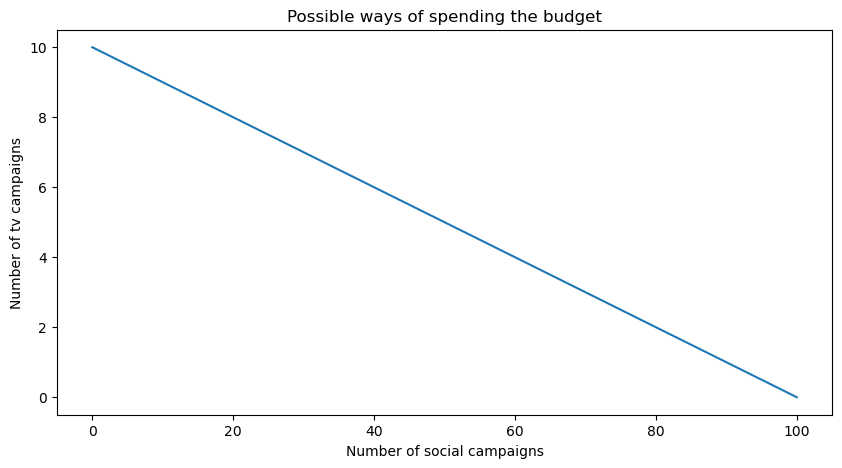

In [9]:
social_x =  np.linspace(social_min, social_max, 100)
tv_y =  n_tv(social_x, budget)

plt.figure(figsize=(10,5))
plt.plot(social_x, tv_y)
plt.xlabel('Number of social campaigns')
plt.ylabel('Number of tv campaigns')
plt.title('Possible ways of spending the budget')
plt.show()

Suppose that through eperimentation and analysis, somebody has been able to identify the revenue curve for your business and that it is defined as:

Revenue = 7 times the number of social campaigns to the power 3/4 times the number of tv campaigns to the power 1/4.


Task 4 - The function should return the value of the revenue curve.

In [10]:
def revenues(social, tv):
    return 7 * (social ** (3/4)) * (tv ** (1/4))

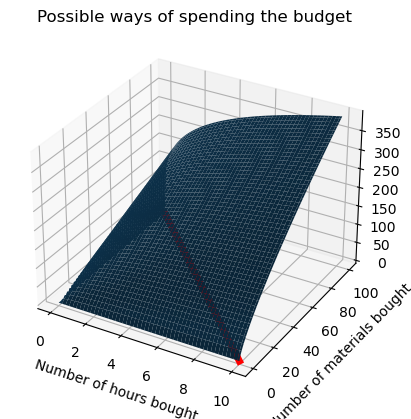

In [12]:
from mpl_toolkits.mplot3d import Axes3D
social_axis = np.linspace(social_min, social_max, 100)
tv_axis = np.linspace(tv_min, tv_max, 100)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(tv_grid, social_grid, revenues(social_grid, tv_grid))

ax.plot(tv_y, social_x, linewidth = 5, color = 'r')

ax.set_xlabel('Number of hours bought')
ax.set_ylabel('Number of materials bought')
ax.set_title('Possible ways of spending the budget')
plt.show()

The goal is to idenify the highest point on the 3D curve that is exactly on the constraint line.



We need to find the point where the revenue contour is tangent to the constraint line.
The method we use for this is Lagrange Multiplier.

We can find the maximum at the point where the gradient of the Revenue contour is proportional to the gradient of the constraint line.

“gradient of revenues” = lambda times “gradient of constraint”

 Since there are two variables in each, we need two partial derivatives to get a vector of those two derivatives.


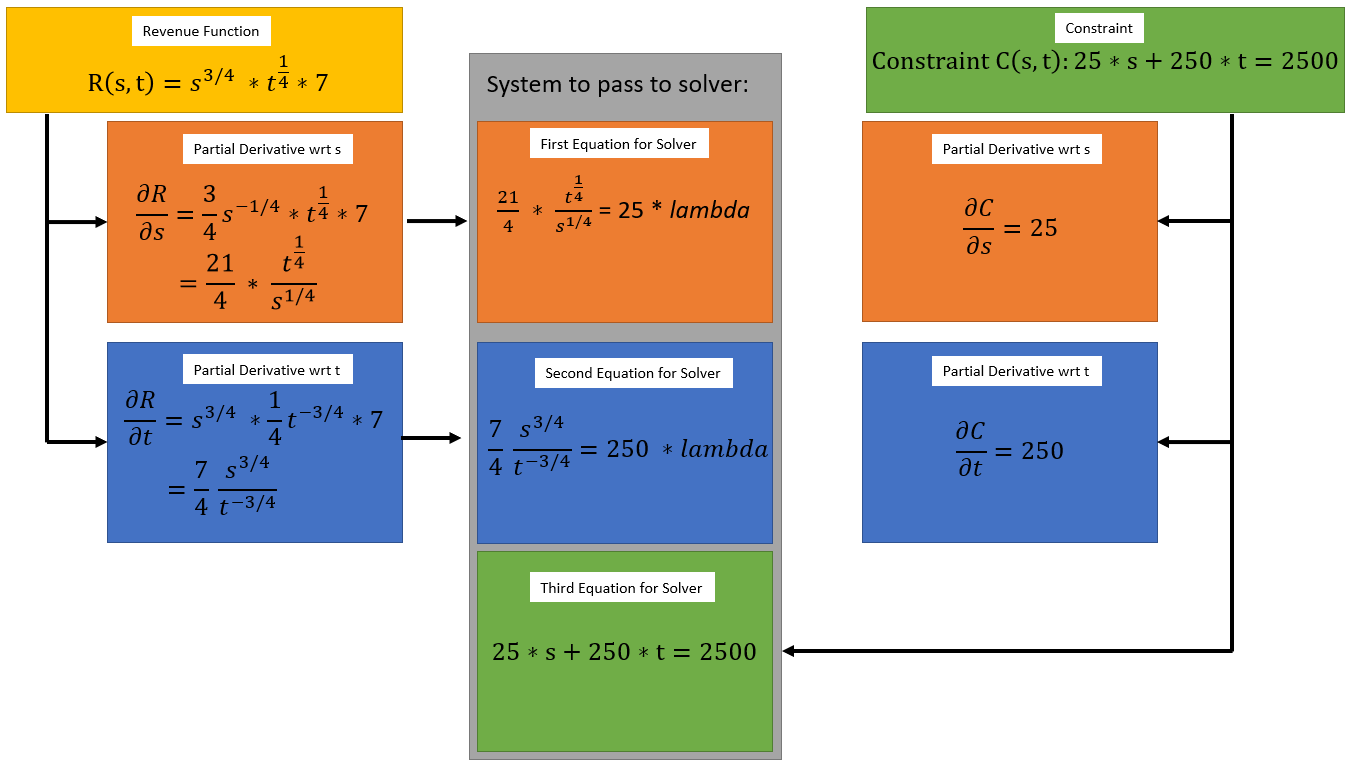

We pass these equations in a Python solver.

In [14]:
from sympy import *

s, t, l = symbols('s t l')

solve([Eq((21/4)*((t**(1/4))/s**(1/4)) - 25*l, 0),
   Eq((7/4)*(s**(3/4)/t**(3/4)) - 250*l, 0),
   Eq(25*s+250*t - 2500, 0)], [s,t,l], simplify=False)

[(75.0000000000000, 2.50000000000000, 0.0897302713432092)]

TASK 5 - Take the first and the second value of the array returned above and pass them as parameters in the function mentioned below.

In [23]:
revenues(75, 2.5) #TD.

224.3256783580229